In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment & Make ‘PassengerId’ as the index column

In [323]:
df=pd.read_csv("titanic_dataset.csv",index_col='PassengerId')

In [324]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [325]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [326]:
df.shape

(891, 11)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 5. Handling missing values

In [328]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [329]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [330]:
freqgraph=df.select_dtypes(include='float')

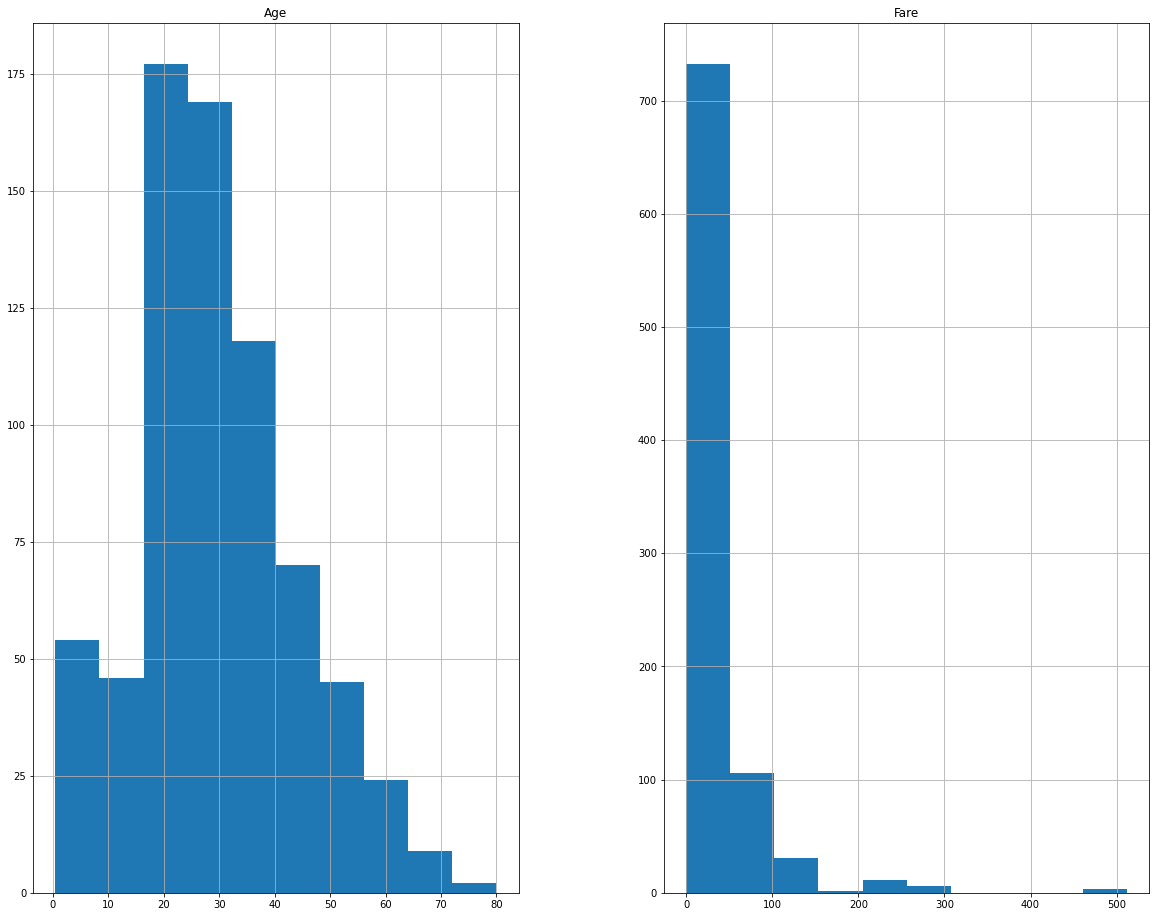

In [331]:
freqgraph.hist(figsize=(20,16))
plt.show()

In [332]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [333]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [334]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [377]:
for i in ['Cabin', 'Embarked']:
 df[i]=df[i].fillna(df[i].mode())

In [379]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

# Handling outliers

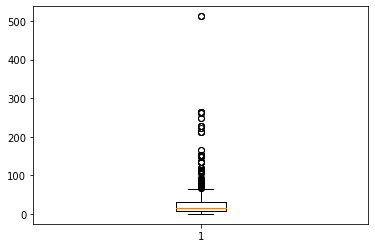

In [337]:
plt.boxplot(df['Fare'])
plt.show()

In [338]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
ll=Q1-1.5*IQR
up=Q3+1.5*IQR

In [339]:
outlier=[]
for x in df['Fare']:
    if((x>up)or(x<ll)):
       outlier.append(x)

In [340]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [341]:
ind1=df['Fare']>up

In [342]:
df.drop(df.loc[ind1].index,inplace=True)

In [343]:
ind2=df['Fare']<ll

In [344]:
df.drop(df.loc[ind2].index,inplace=True)

In [345]:

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,E46,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C148,S


{'whiskers': [<matplotlib.lines.Line2D at 0x1609414c580>,
 'caps': [<matplotlib.lines.Line2D at 0x1609414c850>,
 'boxes': [<matplotlib.lines.Line2D at 0x16094873580>],
 'medians': [<matplotlib.lines.Line2D at 0x1609414c910>],
 'fliers': [<matplotlib.lines.Line2D at 0x16094135040>],
 'means': []}

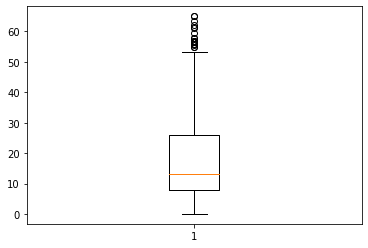

In [346]:
plt.boxplot(df['Fare'])

# 2

{'whiskers': [<matplotlib.lines.Line2D at 0x160940a9fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x160946ec5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x160940a9d00>],
 'medians': [<matplotlib.lines.Line2D at 0x160946ecb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x160946ece20>],
 'means': []}

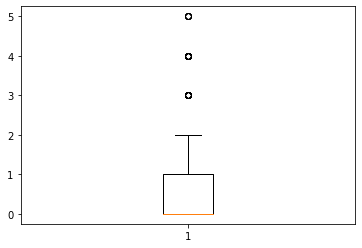

In [347]:

plt.boxplot(df['SibSp'])

In [348]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
ll=Q1-1.5*IQR
up=Q3+1.5*IQR

In [349]:
ll

-1.5

In [350]:
up

2.5

In [351]:
outlier2=[]
for x in df['SibSp']:
    if((x>up)or(x<ll)):
       outlier2.append(x)

In [352]:
outlier2

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [353]:
ind1=df['SibSp']>up

In [354]:
df.drop(df.loc[ind1].index,inplace=True)

In [355]:
ind2=df['SibSp']<ll

In [356]:
df.drop(df.loc[ind2].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1609475f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1609475f970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1609475f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1609475ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1609442d220>],
 'means': []}

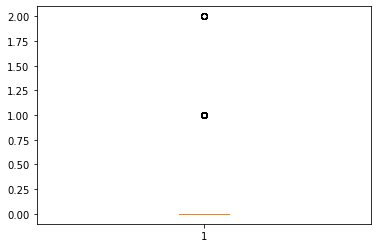

In [357]:
plt.boxplot(df['SibSp'])

# 3

{'whiskers': [<matplotlib.lines.Line2D at 0x16094fbd130>,
 'caps': [<matplotlib.lines.Line2D at 0x16094fbd6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16094fb0e20>],
 'medians': [<matplotlib.lines.Line2D at 0x16094fbdc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x16094fbdf40>],
 'means': []}

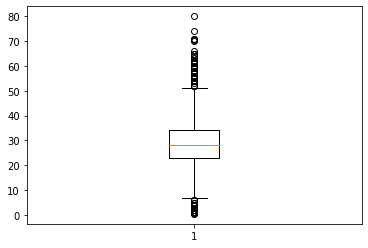

In [358]:
plt.boxplot(df['Age'])


In [359]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
ll=Q1-1.5*IQR
up=Q3+1.5*IQR

In [360]:
ll

6.125

In [361]:
up

51.125

In [362]:
outlier3=[]
for x in df['Age']:
    if((x>up)or(x<ll)):
       outlier3.append(x)

In [363]:
outlier3

[54.0,
 4.0,
 58.0,
 55.0,
 66.0,
 3.0,
 65.0,
 5.0,
 0.83,
 59.0,
 71.0,
 70.5,
 55.5,
 61.0,
 1.0,
 56.0,
 1.0,
 4.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 1.0,
 3.0,
 5.0,
 52.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 4.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 70.0,
 60.0,
 4.0,
 60.0,
 52.0,
 52.0,
 6.0,
 4.0,
 6.0,
 0.67,
 57.0,
 54.0,
 5.0,
 1.0,
 0.42,
 1.0,
 0.83,
 74.0,
 4.0]

In [364]:
ind1=df['Age']>up

In [365]:
df.drop(df.loc[ind1].index,inplace=True)

In [366]:
ind2=df['Age']<ll

In [367]:
df.drop(df.loc[ind2].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x160941b04c0>,
 'caps': [<matplotlib.lines.Line2D at 0x160941b0a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x160941b01c0>],
 'medians': [<matplotlib.lines.Line2D at 0x16094eed040>],
 'fliers': [<matplotlib.lines.Line2D at 0x16094eed310>],
 'means': []}

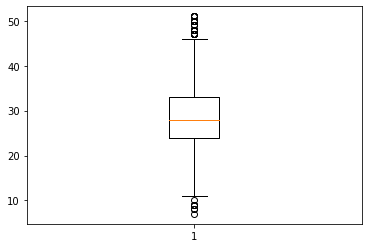

In [368]:
plt.boxplot(df['Age'])

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [392]:
from sklearn import preprocessing

In [393]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.328336,2.502249,28.907046,0.259370,0.256372,16.508370
std,0.469960,0.723632,8.489990,0.487269,0.750536,13.327935
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.250000
max,1.000000,3.000000,51.000000,2.000000,6.000000,65.000000


In [395]:
x = df['Survived'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['Survived'] = x_scaled

In [397]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.328336,2.502249,28.907046,0.259370,0.256372,16.508370
std,0.469960,0.723632,8.489990,0.487269,0.750536,13.327935
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.250000
max,1.000000,3.000000,51.000000,2.000000,6.000000,65.000000
